<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assigment-1" data-toc-modified-id="Assigment-1-1">Assigment 1</a></span><ul class="toc-item"><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-1.1">Problem 1</a></span></li><li><span><a href="#Problem-2" data-toc-modified-id="Problem-2-1.2">Problem 2</a></span><ul class="toc-item"><li><span><a href="#Generate-Points" data-toc-modified-id="Generate-Points-1.2.1">Generate Points</a></span></li><li><span><a href="#Find-LS-Weights" data-toc-modified-id="Find-LS-Weights-1.2.2">Find LS Weights</a></span></li><li><span><a href="#L2-Regularization" data-toc-modified-id="L2-Regularization-1.2.3">L2 Regularization</a></span></li></ul></li><li><span><a href="#Problem-3" data-toc-modified-id="Problem-3-1.3">Problem 3</a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.3.1">Load Data</a></span></li><li><span><a href="#K-NN-Classifer" data-toc-modified-id="K-NN-Classifer-1.3.2">K-NN Classifer</a></span><ul class="toc-item"><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-1.3.2.1">Cross-Validation</a></span></li><li><span><a href="#Test-KNN-Classifer" data-toc-modified-id="Test-KNN-Classifer-1.3.2.2">Test KNN Classifer</a></span></li></ul></li><li><span><a href="#Apply-Other-Classifers" data-toc-modified-id="Apply-Other-Classifers-1.3.3">Apply Other Classifers</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.3.3.1">Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-1.3.3.2">Naive Bayes</a></span></li></ul></li></ul></li><li><span><a href="#Problem-4" data-toc-modified-id="Problem-4-1.4">Problem 4</a></span><ul class="toc-item"><li><span><a href="#Multiplication-by-a-constant" data-toc-modified-id="Multiplication-by-a-constant-1.4.1">Multiplication by a constant</a></span></li><li><span><a href="#Convert-to-a-sigmoid-neuron" data-toc-modified-id="Convert-to-a-sigmoid-neuron-1.4.2">Convert to a sigmoid neuron</a></span></li><li><span><a href="#Outputs-of-Fig-1-MLP-with-Perceptrons" data-toc-modified-id="Outputs-of-Fig-1-MLP-with-Perceptrons-1.4.3">Outputs of Fig 1 MLP with Perceptrons</a></span></li><li><span><a href="#Outputs-of-Fig-1-MLP-with-Sigmoid-Neurons" data-toc-modified-id="Outputs-of-Fig-1-MLP-with-Sigmoid-Neurons-1.4.4">Outputs of Fig 1 MLP with Sigmoid Neurons</a></span></li><li><span><a href="#Adder-with-Perceptrons" data-toc-modified-id="Adder-with-Perceptrons-1.4.5">Adder with Perceptrons</a></span></li></ul></li><li><span><a href="#Problem-5" data-toc-modified-id="Problem-5-1.5">Problem 5</a></span><ul class="toc-item"><li><span><a href="#NNs-with-PyTorch" data-toc-modified-id="NNs-with-PyTorch-1.5.1">NNs with PyTorch</a></span><ul class="toc-item"><li><span><a href="#Load-MNIST-data-again" data-toc-modified-id="Load-MNIST-data-again-1.5.1.1">Load MNIST data again</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Assigment 1
Vimig Socrates

----


In [1]:
%load_ext autoreload
%autoreload 2

## Problem 1

Firstly, a machine is learning if it is gaining the ability to perform better and better at a task. In order to measure this, we have three main components: experience E, task set T, and performance measure P. A task set is usually described as processing a series of examples, each of which has features. So, a machine is learning, if P improves at tasks T, by gaining information from E. Often, we use machine learning solutions to approximate other questions that are not easily answerable, either analytically or due to external constraints. 

## Problem 2

### Generate Points

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
Ns = [15, 100]
sigmas = [0, 0.05, .2]

def get_data(N, sigma):
    x = np.random.uniform(-1, 3, size=(N))
    y = x**2 - (3*x) + 1
    y = np.random.normal(scale=sigma, size=(N)) + y
    return x, y

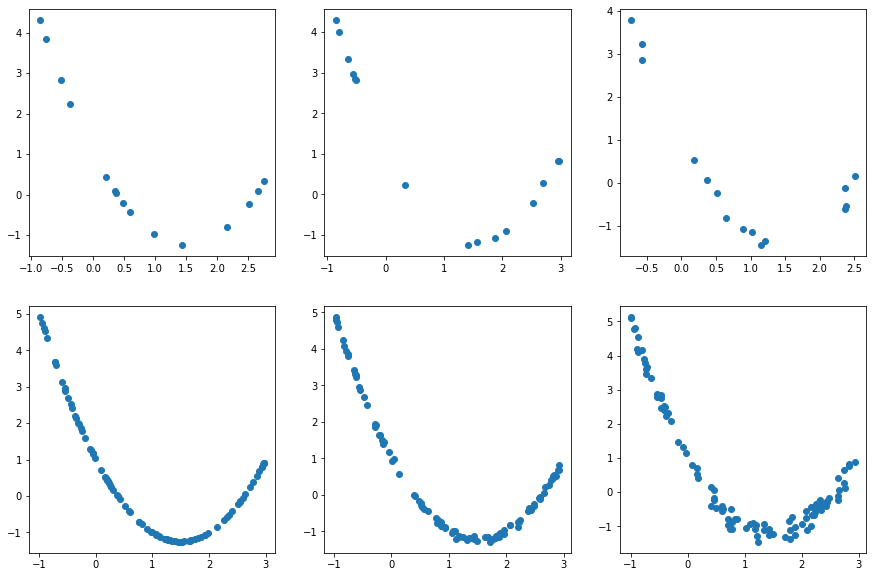

In [4]:
import itertools

xs = []
ys = []
fig, axs = plt.subplots(2, 3, figsize=(15,10))
for ax, (N, sigma) in zip(axs.ravel(),(itertools.product(Ns,sigmas))):
    x, y = get_data(N, sigma)
    xs.append(x)
    ys.append(y)
    
    ax.scatter(x,y)

plt.show()

### Find LS Weights

In [5]:
def get_design_mat(x, degree):
    design_mat = np.ones((degree + 1,len(x)))
    for deg in range(1,degree + 1):
        design_mat[deg,:] = x ** deg
    design_mat = design_mat.T
    return design_mat

In [6]:
list(itertools.product(Ns,sigmas))

[(15, 0), (15, 0.05), (15, 0.2), (100, 0), (100, 0.05), (100, 0.2)]

In [7]:
def mse(out,target):
    mse = ((out - target)**2).mean()
    return mse

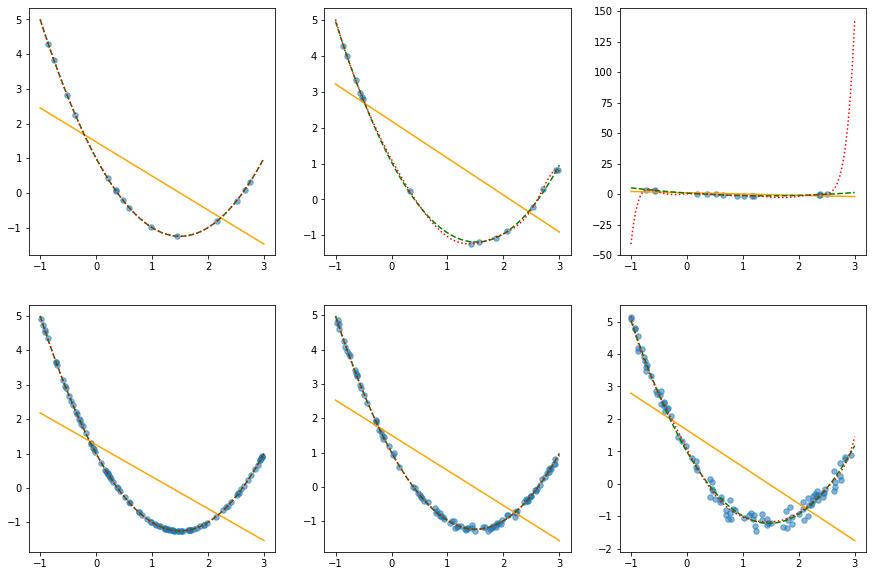

In [8]:
import itertools

fig, axs = plt.subplots(2, 3, figsize=(15,10))
t = np.linspace(-1, 3, 100)

poly1_weights = []
poly2_weights = []
poly9_weights = []

poly1_mse = []
poly2_mse = []
poly9_mse = []


for ax,x,y in zip(axs.ravel(),xs, ys):
    design_mat = get_design_mat(x,1)
    ws = np.linalg.inv(design_mat.T @ design_mat) @ design_mat.T @ y
    s = ws[0] + (ws[1] * t )
    poly1_weights.append(ws)
    poly1_mse.append(mse(y,(ws[0] + (ws[1] * x ))))
    ax.plot(t, s, linestyle="-",color="orange")
    
    design_mat = get_design_mat(x,2)
    ws = np.linalg.inv(design_mat.T @ design_mat) @ design_mat.T @ y
    s = ws[0] + (ws[1] * t ) + (ws[2] * t**2)
    poly2_weights.append(ws)
    poly2_mse.append(mse(y,(ws[0] + (ws[1] * x ) + (ws[2] * x**2))))
    ax.plot(t, s, linestyle="--", color="green")
    
    design_mat = get_design_mat(x,9)
    ws = np.linalg.inv(design_mat.T @ design_mat) @ design_mat.T @ y
    s = ws[0] + (ws[1] * t ) + (ws[2] * t**2) + (ws[3] * t**3) + (ws[4] * t**4) + (ws[5] * t**5) + \
        (ws[6] * t**6)+ (ws[7] * t**7) + (ws[8] * t**8) + (ws[9] * t**9) 
    poly9_weights.append(ws)
    poly9_mse.append(mse(y,(ws[0] + (ws[1] * x ) + (ws[2] * x**2) + (ws[3] * x**3) + (ws[4] * x**4) + (ws[5] * x**5) + (ws[6] * x**6)+ (ws[7] * x**7) + (ws[8] * x**8) + (ws[9] * x**9) )))
    ax.plot(t, s, linestyle=":", color="red")

    ax.scatter(x, y, s=30, alpha=0.55)

plt.show()

In [9]:
# poly1_mse
poly1_results = pd.DataFrame(
    {'weights': poly1_weights,
     'MSE': poly1_mse,
    },index=['(15, 0)', '(15, 0.05)', '(15, 0.2)', '(100, 0)', '(100, 0.05)', '(100, 0.2)'])
poly1_results['weights'] = poly1_results['weights'].map(lambda x: [round(a, 2) for a in x])
display(poly1_results)

,weights,MSE
"(15, 0)","[1.47, -0.98]",1.471913
"(15, 0.05)","[2.18, -1.03]",1.437054
"(15, 0.2)","[1.17, -1.03]",1.453175
"(100, 0)","[1.25, -0.93]",1.605949
"(100, 0.05)","[1.51, -1.02]",1.514090
"(100, 0.2)","[1.66, -1.14]",1.505191


In [10]:
# poly1_mse
poly2_results = pd.DataFrame(
    {'weights': poly2_weights,
     'MSE': poly2_mse,
    },index=['(15, 0)', '(15, 0.05)', '(15, 0.2)', '(100, 0)', '(100, 0.05)', '(100, 0.2)'])

poly2_results['weights'] = poly2_results['weights'].map(lambda x: [round(a, 2) for a in x])
display(poly2_results)

,weights,MSE
"(15, 0)","[1.0, -3.0, 1.0]",2.607606e-30
"(15, 0.05)","[1.04, -2.95, 0.97]",1.760019e-03
"(15, 0.2)","[0.92, -3.16, 1.11]",2.682030e-02
"(100, 0)","[1.0, -3.0, 1.0]",4.644013e-29
"(100, 0.05)","[1.01, -2.98, 0.99]",2.396036e-03
"(100, 0.2)","[0.99, -3.01, 1.02]",3.131821e-02


In [11]:
# poly1_mse
poly9_results = pd.DataFrame(
    {'weights': poly9_weights,
     'MSE': poly9_mse,
    },index=['(15, 0)', '(15, 0.05)', '(15, 0.2)', '(100, 0)', '(100, 0.05)', '(100, 0.2)'])
poly9_results['weights'] = poly9_results['weights'].map(lambda x: [round(a, 2) for a in x])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(poly9_results)

,weights,MSE
"(15, 0)","[1.0, -3.0, 1.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0...",6.932000e-17
"(15, 0.05)","[1.11, -2.9, 0.72, -0.28, 0.12, 0.36, -0.06, -...",2.354998e-04
"(15, 0.2)","[0.23, 2.93, -5.31, -22.71, 42.14, 0.44, -45.8...",1.465141e-02
"(100, 0)","[1.0, -3.0, 1.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0...",9.469035e-16
"(100, 0.05)","[1.0, -2.93, 1.08, -0.12, -0.09, 0.13, 0.0, -0...",2.314035e-03
"(100, 0.2)","[1.08, -3.29, 0.48, 1.0, 0.32, -0.94, 0.29, 0....",2.780888e-02


In assessing the fit, of course the linear models (degree 1) do not perform well to represent what looks to be quadratic data. Both the (degree 2 and deg 9) seem to do well, though it looks like with increased noise, the deg 9 polynomial does seem to be overfitting a little bit. You can see this particularly in the last plot where there are a few dips that deviate away from the underlying quadratic shape to minimize error due to the higher degrees of freedom, though this is just noise that is being fit to. Conversely, all the linear models underfit, since they don't accurately capture the shape of the data. 

### L2 Regularization

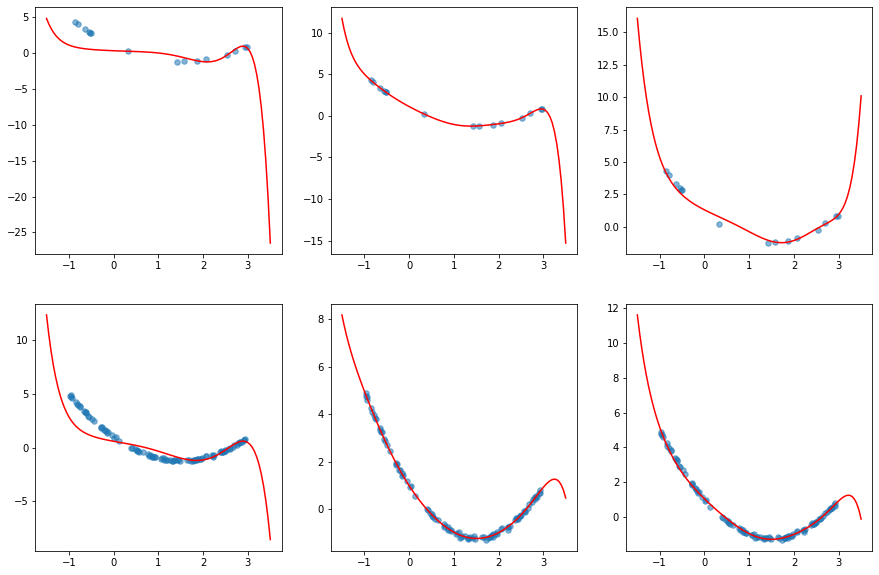

In [12]:
import itertools

fig, axs = plt.subplots(2, 3, figsize=(15,10))
t = np.linspace(-1.5, 3.5, 100)

lambda_vals = np.tile(np.array([50,0.00001,.75]), [2,1])
axs = axs.ravel()

poly9_weights = []
poly9_mse  = []

for lambda_val,ax,x,y in zip(lambda_vals[0,:], axs[:3], np.tile(xs[1],[3,1]), np.tile(ys[1],[3,1])):
    design_mat = get_design_mat(x,9)
    ws = np.linalg.inv(lambda_val * np.identity(design_mat.shape[1]) + (design_mat.T @ design_mat)) @ design_mat.T @ y
    s = ws[0] + (ws[1] * t ) + (ws[2] * t**2) + (ws[3] * t**3) + (ws[4] * t**4) + (ws[5] * t**5) + \
        (ws[6] * t**6)+ (ws[7] * t**7) + (ws[8] * t**8) + (ws[9] * t**9) 
    poly9_weights.append(ws)
    poly9_mse.append(mse(y,(ws[0] + (ws[1] * x ) + (ws[2] * x**2) + (ws[3] * x**3) + (ws[4] * x**4) + (ws[5] * x**5) + (ws[6] * x**6)+ (ws[7] * x**7) + (ws[8] * x**8) + (ws[9] * x**9) )))
    
    ax.plot(t, s, linestyle="-", color="red")

    ax.scatter(x, y, s=30, alpha=0.55)

for lambda_val,ax,x,y in zip(lambda_vals[1,:],axs[3:], np.tile(xs[4],[3,1]), np.tile(ys[4],[3,1])):
    design_mat = get_design_mat(x,9)
    ws = np.linalg.inv((lambda_val * np.identity(design_mat.shape[1])) + (design_mat.T @ design_mat)) @ design_mat.T @ y
    s = ws[0] + (ws[1] * t ) + (ws[2] * t**2) + (ws[3] * t**3) + (ws[4] * t**4) + (ws[5] * t**5) + \
        (ws[6] * t**6)+ (ws[7] * t**7) + (ws[8] * t**8) + (ws[9] * t**9) 
    poly9_weights.append(ws)
    poly9_mse.append(mse(y,(ws[0] + (ws[1] * x ) + (ws[2] * x**2) + (ws[3] * x**3) + (ws[4] * x**4) + (ws[5] * x**5) + (ws[6] * x**6)+ (ws[7] * x**7) + (ws[8] * x**8) + (ws[9] * x**9) )))

    ax.plot(t, s, linestyle="-", color="red")

    ax.scatter(x, y, s=30, alpha=0.55)
    
    
plt.show()

In [13]:
poly9_results = pd.DataFrame(
    {'weights': poly9_weights,
     'MSE': poly9_mse,
    },index=['(15, 0.05, lambda=50)', '(15, 0.05, lambda=0.00001)', '(15, 0.05, lambda=0.75)', '(100, 0, lambda=50)', '(100, 0.05, lambda=0.00001)', '(100, 0.2, lambda=0.75)'])
poly9_results['weights'] = poly9_results['weights'].map(lambda x: [round(a, 2) for a in x])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(poly9_results)

,weights,MSE
"(15, 0.05, lambda=50)","[0.31, -0.25, 0.12, -0.15, 0.04, -0.1, 0.03, -...",3.209156
"(15, 0.05, lambda=0.00001)","[1.11, -2.9, 0.71, -0.28, 0.13, 0.35, -0.06, -...",0.000236
"(15, 0.05, lambda=0.75)","[1.31, -1.77, 0.59, -0.75, 0.29, -0.26, 0.3, -...",0.058028
"(100, 0, lambda=50)","[0.58, -0.77, 0.2, -0.48, 0.17, -0.24, 0.28, -...",0.851173
"(100, 0.05, lambda=0.00001)","[1.0, -2.93, 1.08, -0.12, -0.09, 0.13, 0.0, -0...",0.002314
"(100, 0.2, lambda=0.75)","[1.05, -2.51, 0.62, -0.51, 0.42, 0.04, -0.02, ...",0.008877


## Problem 3

### Load Data

In [14]:
import pandas as pd
import io   

df = pd.read_csv("./data/data_seed.dat", 
                 sep="\s+", #separator whitespace
                 header=None) 
data = df.to_numpy(dtype=np.float)

In [15]:
X = data[:, :-1]

# min-max scaling
from sklearn.preprocessing import minmax_scale
X = minmax_scale(X) ; print(X.shape)

y = data[:, -1]
# print(len(X))
# print(len(y))

(210, 7)


### K-NN Classifer

In [16]:
from scipy import stats

#### Cross-Validation

In [17]:
def cross_validation_splits(X, y, n_splits=5):
    N = X.shape[0]
    idxs = np.arange(N)
    np.random.shuffle(idxs)
    idx_groups = np.array_split(idxs, n_splits)
    X_splits = [X[idxs, :] for idxs in idx_groups]
    y_splits = [y[idxs] for idxs in idx_groups]    
    return X_splits, y_splits

In [18]:
def cross_validation(estimator, Xs, ys, return_avg=True):
    train_err = []
    test_err = []
    kfolds = len(Xs)

    for k in range(kfolds):
        X_train = np.concatenate([Xs[i] for i in range(kfolds) if i != k], axis=0)
        y_train = np.concatenate([ys[i] for i in range(kfolds) if i != k], axis=0)
        X_test = Xs[k]
        y_test = ys[k]
        
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_train)
        train_err.append(1 - np.equal(y_train, y_pred).sum() / len(y_train))
        y_pred = estimator.predict(X_test)
        test_err.append(1 - np.equal(y_test, y_pred).sum() / len(y_test))
    
    if return_avg:
        return sum(train_err)/len(train_err), sum(test_err)/len(test_err)
    
    return train_err, test_err

#### Test KNN Classifer

In [19]:
from sklearn.neighbors import NearestNeighbors

class KNNClassifer:
    def __init__(self, k):
        self.k = k
        self.neigh = NearestNeighbors()
        
    def fit(self,X, y):
        self.neigh.fit(X)
        self.y = y
        
    def predict(self,X):
        neighbor_idxs = self.neigh.kneighbors(X, self.k, return_distance=False)
        return stats.mode(self.y[neighbor_idxs], axis=1).mode.reshape(-1)

##### 5-Fold

In [20]:
X_splits, y_splits = cross_validation_splits(X,y, n_splits=5)

In [21]:
test_err_by_k = []
for k in [1,5,10,15]:
    clf = KNNClassifer(k=k)
    train_err, test_err = cross_validation(clf, X_splits, y_splits)    
    test_err_by_k.append(test_err)

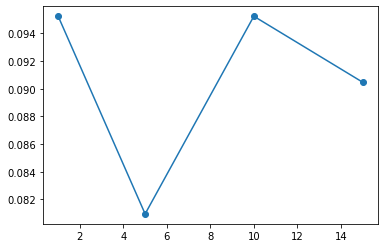

In [22]:
test_err_by_k
fig = plt.figure()
plt.plot([1,5,10,15], test_err_by_k, marker=".",markersize=12)


##### Leave-one-out Validation

In [23]:
X_splits, y_splits = cross_validation_splits(X,y, n_splits=len(y))

In [24]:
test_err_by_k = []
for k in [1,5,10,15]:
    clf = KNNClassifer(k=k)
    train_err, test_err = cross_validation(clf, X_splits, y_splits)
    test_err_by_k.append(test_err)

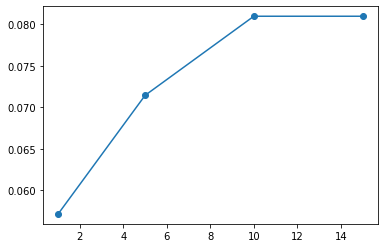

In [25]:
test_err_by_k
fig = plt.figure()
plt.plot([1,5,10,15], test_err_by_k, marker=".",markersize=12)


It seems that there is a sweet spot for the number of k. With too few, the model overfits to the data by taking only the closest value. However, after a certain amount, you result in more and more underfitting. This trend makes sense as the more neighborhood context you take into account, the less local neighborhood has influence, and is more likely to cluster the values incorrectly, assuming that the data is generally clustered well by distance and density.

### Apply Other Classifers

#### Logistic Regression

In [26]:
X_splits, y_splits = cross_validation_splits(X,y, n_splits=5)

In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=800)
train_err, test_err = cross_validation(clf, X_splits, y_splits)    
print("Training Error: " ,train_err)
print("Test Error: " ,test_err)

Training Error:  0.07023809523809525
Test Error:  0.07619047619047621


#### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
train_err, test_err = cross_validation(clf, X_splits, y_splits)    
print("Training Error: " ,train_err)
print("Test Error: " ,test_err)

Training Error:  0.08928571428571427
Test Error:  0.0857142857142857


1. No hyperparameters needed to be tuned for either logistic regression or Naive Bayes. NB could have used different priors, but we don't really have a good reason for choosing any particular priors, so we didn't modulate this.
2. The KNN classifier performed the best, depending on the value of *k* used. Particularly with the leave-one-out validation, the results were higher than any of the other classifiers. However, comparing apples-apples, the KNN classifier also did better, marginally over the logistic regression method. 
3. None of them really underfit the data, excluding the discussion on choice of *k* above. 
4. As discussed, the other methods performed reasonably well (<10% error), though not quite as good as the KNN classifier



## Problem 4

### Multiplication by a constant

Our perceptron is defined as: 

\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } w\cdot x + b \leq 0 \\
      1 & \mbox{if } w\cdot x + b > 0
    \end{array}
  \right.
\tag{2}\end{eqnarray}

If we add c to both pieces in our piecewise function we get 

\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } c w\cdot x + cb \leq 0 \\
      1 & \mbox{if } cw\cdot x + cb > 0
    \end{array}
  \right.
\end{eqnarray}

\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } c (w\cdot x + b) \leq 0 \\
      1 & \mbox{if } c(w\cdot x + b) > 0
    \end{array}
  \right.
\end{eqnarray}

If we divide both sides by $c$ (assuming $c>0$), we get the original inequalities, so the behavior is the same: 

\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } c (w\cdot x + b)/c \leq 0/c \\
      1 & \mbox{if } c(w\cdot x + b)/c > 0/c
    \end{array}
  \right.
\end{eqnarray}

\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } w\cdot x + b \leq 0 \\
      1 & \mbox{if } w\cdot x + b > 0
    \end{array}
  \right.
\end{eqnarray}

### Convert to a sigmoid neuron

We have to check both cases in our activation piecewise function when we convert the perceptron to a sigmoid neuron. Our activation looks like the following (with the constant c added):

\begin{eqnarray}
  \frac{1}{1 + e^{-c(w\cdot x + b)}}
\end{eqnarray}

In case 1 where $w\cdot x + b > 0$ as 

\begin{eqnarray}
  \lim_{c\to\infty}  \frac{1}{1 + e^{-c(w\cdot x + b)}} = \frac{1}{1 + e^{-\infty}} = \frac{1}{1} = 1
\end{eqnarray}

In case 1 where $w\cdot x + b < 0$ as 

\begin{eqnarray}
  \lim_{c\to\infty}  \frac{1}{1 + e^{-c(w\cdot x + b)}} = \frac{1}{1 + e^{\infty}} = \frac{1}{\infty} = 0
\end{eqnarray}

So this functions exactly like a perceptron does. However, with $w\cdot x + b = 0$

\begin{eqnarray}
  \lim_{c\to\infty}  \frac{1}{1 + e^{-c(w\cdot x + b)}} = \frac{1}{1 + e^{0}} = \frac{1}{2} 
\end{eqnarray}

In a perceptron, this value would be 0. Therefore, it resembles a perceptron except at 0. 



### Outputs of Fig 1 MLP with Perceptrons

In [29]:
def hd1(x) : return 1 if np.dot(np.array([0.6, 0.5, -0.6]),x) > -0.4 else 0
def hd2(x) : return 1 if np.dot(np.array([-0.7, 0.4, 0.8]),x) > -0.5  else 0
def f1(x) : return 1 if np.dot(np.array([1,1]),x) > -0.5 else 0

In [30]:
inputs = list(itertools.product([0, 1], repeat=3))
outputs = np.zeros(8)
for idx, x in enumerate(inputs):
    outputs[idx] = f1(np.array([hd1(np.array(x)), hd2(np.array(x))]))
    
results = pd.DataFrame(
    {"inputs": inputs,
    "outputs":outputs}
) ; results

,inputs,outputs
0,"(0, 0, 0)",1.0
1,"(0, 0, 1)",1.0
2,"(0, 1, 0)",1.0
3,"(0, 1, 1)",1.0
4,"(1, 0, 0)",1.0
5,"(1, 0, 1)",1.0
6,"(1, 1, 0)",1.0
7,"(1, 1, 1)",1.0


### Outputs of Fig 1 MLP with Sigmoid Neurons

In [31]:
def hd1(x) : return 1 if 1/(1 + np.exp(-np.dot(np.array([0.6, 0.5, -0.6]),x) - 0.4)) > 0 else 0
def hd2(x) : return 1 if 1/(1 + np.exp(-np.dot(np.array([-0.7, 0.4, 0.8]),x) - 0.5)) > 0  else 0
def f1(x) : return 1 if 1/(1 + np.exp(-np.dot(np.array([1,1]),x) - 0.5)) > 0 else 0

In [32]:
inputs = list(itertools.product([0, 1], repeat=3))
outputs = np.zeros(8)
for idx, x in enumerate(inputs):
    outputs[idx] = f1(np.array([hd1(np.array(x)), hd2(np.array(x))]))
    
results = pd.DataFrame(
    {"inputs": inputs,
    "outputs":outputs}
) ; results

,inputs,outputs
0,"(0, 0, 0)",1.0
1,"(0, 0, 1)",1.0
2,"(0, 1, 0)",1.0
3,"(0, 1, 1)",1.0
4,"(1, 0, 0)",1.0
5,"(1, 0, 1)",1.0
6,"(1, 1, 0)",1.0
7,"(1, 1, 1)",1.0


### Adder with Perceptrons

In order to create a two-bit adder with perceptrons, we simply have to combine a half-adder with a full-adder all of which can be made from NAND gates. In the below example, $0$ is the least significant bit and two bit numbers are $A$ and $B$.  All the edges (except the one in red) have weights -2, biases = 3. 

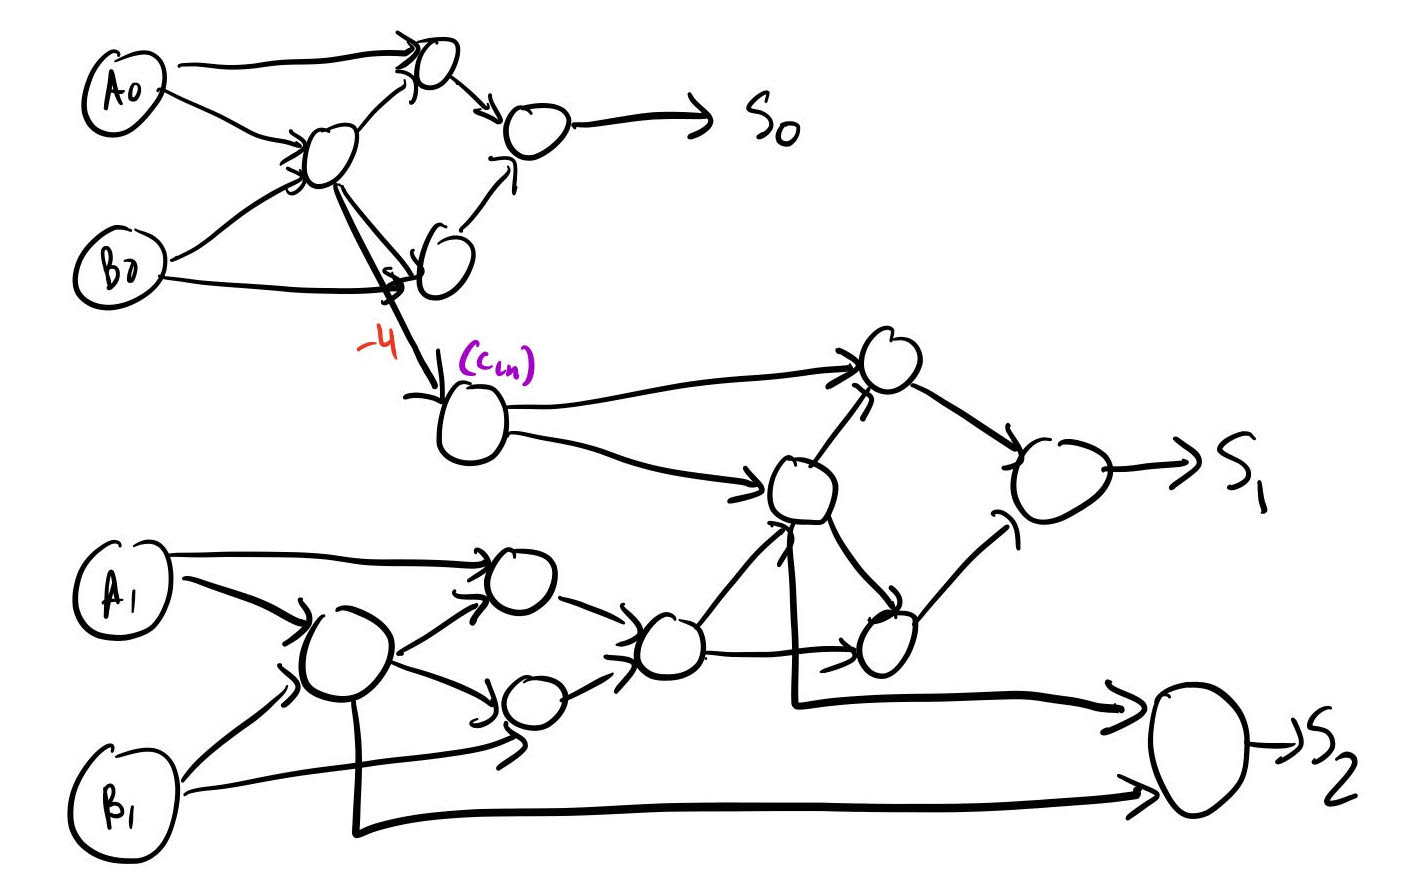

## Problem 5

In [33]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [34]:
import network
net = network.Network([784, 30, 10])

In [35]:
results = net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0 : 8128 / 10000
Epoch 1 : 8302 / 10000
Epoch 2 : 8343 / 10000
Epoch 3 : 8394 / 10000
Epoch 4 : 8418 / 10000
Epoch 5 : 8442 / 10000
Epoch 6 : 9342 / 10000
Epoch 7 : 9355 / 10000
Epoch 8 : 9381 / 10000
Epoch 9 : 9369 / 10000
Epoch 10 : 9383 / 10000
Epoch 11 : 9413 / 10000
Epoch 12 : 9432 / 10000
Epoch 13 : 9441 / 10000
Epoch 14 : 9438 / 10000
Epoch 15 : 9458 / 10000
Epoch 16 : 9456 / 10000
Epoch 17 : 9441 / 10000
Epoch 18 : 9454 / 10000
Epoch 19 : 9451 / 10000
Epoch 20 : 9461 / 10000
Epoch 21 : 9480 / 10000
Epoch 22 : 9456 / 10000
Epoch 23 : 9490 / 10000
Epoch 24 : 9484 / 10000
Epoch 25 : 9488 / 10000
Epoch 26 : 9471 / 10000
Epoch 27 : 9487 / 10000
Epoch 28 : 9486 / 10000
Epoch 29 : 9508 / 10000


### NNs with PyTorch

In [36]:
import torch
from torchvision import datasets, transforms

In [37]:
learning_rate = 0.01
momentum = 0.9
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

#### Load MNIST data again

I was in Unsupervised! Please see my pset 3 for a description of the hyperparameter search. However, I took the best model from there and proceeded with a confusion matrix analysis. Thank you! 

In [48]:
mnist_train = datasets.MNIST(root = './data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))
mnist_test = datasets.MNIST(root = './data', train=False, download=True,
                            transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

In [49]:
train_loader = torch.utils.data.DataLoader(mnist_train, shuffle=True, batch_size = 128)
test_loader = torch.utils.data.DataLoader(mnist_test, shuffle=False, batch_size = 128)

In [50]:
examples = enumerate(test_loader)
next(examples)
batch_idx, (example_data, example_targets) = next(examples)

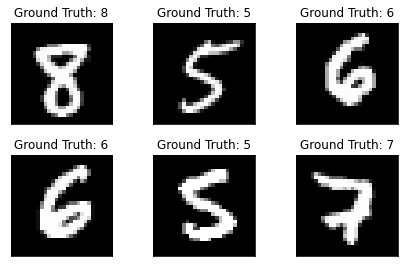

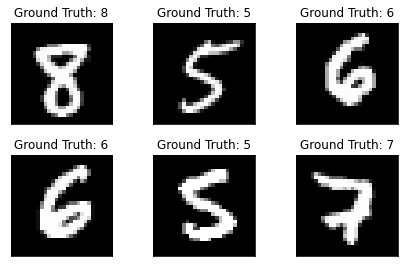

In [51]:
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [61]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [62]:
from pytorchModels import *

In [63]:
def train(model,loss_fn, optimizer, train_loader, test_loader):
    """
    This is a standard training loop, which leaves some parts to be filled in.
    INPUT:
    :param model: an untrained pytorch model
    :param loss_fn: e.g. Cross Entropy loss of Mean Squared Error.
    :param optimizer: the model optimizer, initialized with a learning rate.
    :param training_set: The training data, in a dataloader for easy iteration.
    :param test_loader: The testing data, in a dataloader for easy iteration.
    """
    num_epochs = 10

    iter_counter = 0
    train_confusion_mat = np.zeros((10, 10))
    test_confusion_mat = np.zeros((10, 10))
    train_err = []
    test_err = []
    err_counter = []
    
    for epoch in range(num_epochs):
        # loop through each data point in the training set
        for data, targets in train_loader:
            iter_counter += 1
            optimizer.zero_grad()

            # run the model on the data
            model_input = torch.reshape(torch.squeeze(data), (-1,784)) 
            out = model(model_input)

            # Calculate the loss
            loss = loss_fn(out,targets)

            # Find the gradients of our loss via backpropogation
            loss.backward()

            # Adjust accordingly with the optimizer
            optimizer.step()

        # Give status reports every 100 epochs
        if epoch % 2==0:
            err_counter.append(iter_counter)
            print(f" EPOCH {epoch}. Progress: {epoch/num_epochs*100}%. ")
            train_acc, _ = evaluate(model,train_loader, train_confusion_mat)
            test_acc, _ = evaluate(model,test_loader, test_confusion_mat)
            print(f" Train accuracy: {train_acc}. Test accuracy: {test_acc}") 
            train_err.append(100-train_acc)
            test_err.append(100-test_acc)


    # Final model acc check
    err_counter.append(iter_counter)
    print(f" EPOCH {num_epochs}. Progress: 100%. ")
    train_acc, _ = evaluate(model,train_loader, train_confusion_mat)
    test_acc, _ = evaluate(model,test_loader, test_confusion_mat)
    print(f" Train accuracy: {train_acc}. Test accuracy: {test_acc}") 
    train_err.append(100-train_acc)
    test_err.append(100-test_acc)

    return train_err, test_err, err_counter, train_confusion_mat, test_confusion_mat

In [64]:
def evaluate(model, evaluation_set, confusion_matrix):
    """
    Evaluates the given model on the given dataset.
    Returns the percentage of correct classifications out of total classifications.
    """
    correct = 0
    total = 0
    with torch.no_grad(): # this disables backpropogation, which makes the model run much more quickly.
        for data, labels in evaluation_set:

            model_input = torch.reshape(torch.squeeze(data), (-1,784))
            outputs = model(model_input)
            _, predicted = torch.max(outputs.data, 1)

            for t, p in zip(labels.view(-1), predicted.view(-1)):
                    confusion_matrix[t.long(), p.long()] += 1
            
            total += labels.size(0)
            # gets python number from tensor
            correct += (predicted == labels).sum().item()            
        accuracy = (correct/total)*100
    return accuracy, confusion_matrix


In [65]:
ffn = FFN()
opt = optim.SGD(ffn.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss()
train_err, test_err, err_counter, train_confusion_mat, test_confusion_mat = train(ffn,loss_fn, opt, train_loader, test_loader)

 EPOCH 0. Progress: 0.0%. 
 Train accuracy: 76.61. Test accuracy: 77.79
 EPOCH 2. Progress: 20.0%. 
 Train accuracy: 86.37. Test accuracy: 86.72
 EPOCH 4. Progress: 40.0%. 
 Train accuracy: 88.51833333333333. Test accuracy: 89.03999999999999
 EPOCH 6. Progress: 60.0%. 
 Train accuracy: 89.535. Test accuracy: 90.06
 EPOCH 8. Progress: 80.0%. 
 Train accuracy: 90.22. Test accuracy: 90.58
 EPOCH 10. Progress: 100%. 
 Train accuracy: 90.44666666666666. Test accuracy: 90.8


[23.39, 13.629999999999995, 11.48166666666667, 10.465000000000003, 9.780000000000001, 9.553333333333342]
[22.209999999999994, 13.280000000000001, 10.960000000000008, 9.939999999999998, 9.420000000000002, 9.200000000000003]
[469, 1407, 2345, 3283, 4221, 4690]


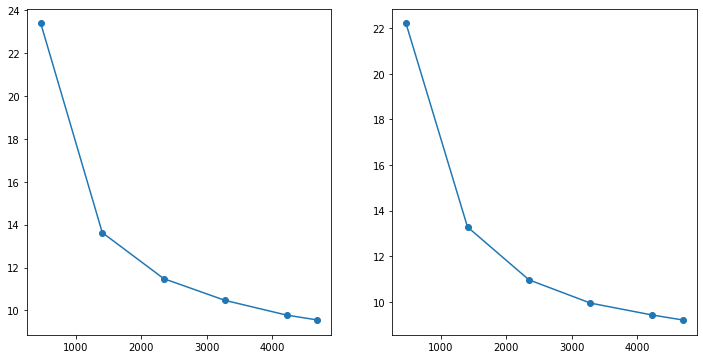

In [66]:
print(train_err)
print(test_err)
print(err_counter)
fig, axs =plt.subplots(1,2,figsize=(12,6))
axs[0].plot(err_counter, train_err, marker=".",markersize=12)
axs[1].plot(err_counter, test_err, marker=".",markersize=12)

In general, the feedforward network achieves 90% accuracy. A plot by iteration is above. It seems that even one epoch is enough to achieve adequate performance, and it only increases from there. 

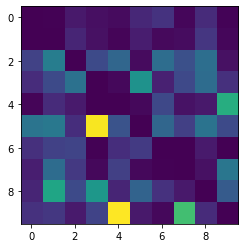

In [67]:

train_confusion_mat = train_confusion_mat.astype(int)
test_confusion_mat = test_confusion_mat.astype(int)
np.fill_diagonal(train_confusion_mat, 0)
np.fill_diagonal(test_confusion_mat, 0)
plt.imshow(train_confusion_mat)


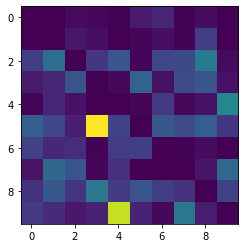

In [68]:
plt.imshow(test_confusion_mat)

In the above confusion matrices, we zero-ed out the diagonals to see the variability in misclassification more clearly. Generally, as we would expect, values that are similar to each other are most often misclassified. This includes values like 3 and 5, as well as 4 and 9. 

Please see my Unsupervised project for an explanation on optimizing the model. 